In [2]:
# Import Modules
#data manipulation
import numpy as np
import pandas as pd

#nn
import torch
import torch.nn as nn
import torch.optim as optim
from scipy.optimize import minimize

#visualization
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error

torch.manual_seed(1)

In [3]:
# Load the Data
df=pd.read_excel('v3_BMED_data.xlsx', sheet_name = 'Opt')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221 entries, 0 to 220
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       221 non-null    float64
 1   V       221 non-null    int64  
 2   E       221 non-null    float64
 3   Ci      221 non-null    float64
 4   t       221 non-null    float64
 5   CF      221 non-null    float64
 6   CA      221 non-null    float64
 7   SEC     221 non-null    float64
 8   JLA     221 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 15.7 KB


## modeling



In [5]:
# Set the training data
X_data = df[['T','V','E','Ci','t']].values
Y_data = df[['CF','CA']].values

# transform the pytorch tensor
X = torch.FloatTensor(X_data)
Y = torch.FloatTensor(Y_data)

# Declare the Custom Models
class CustomModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Sequential(
            nn.Linear(5,4),
            nn.ReLU(),
            nn.Linear(4,4),
            nn.ReLU(),
            nn.Linear(4,2)
        )

    def forward(self, x):
        return self.hidden(x)
    

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
iter = 0
scores = []
for train_index, test_index in kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]
    
    # NN model initialization
    model = CustomModel()
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr = 0.001)

    # Learning Loop
    num_epochs = 10000
    
    for epoch in range(num_epochs+1):
        # forward_propagation
        prediction = model(X_train)
        loss = criterion(prediction,Y_train)

        # back_propagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 200 == 0:
            print(f'iter : {iter+1}, epoch: {epoch}, loss: {loss.item()}')
    yp = model(X_test).detach().numpy()
    Y_test = Y_test.detach().numpy()
    mse_score = mean_squared_error(Y_test,yp)
    scores.append(mse_score)
    iter += 1
    

print("Cross validation scores : {}".format(scores))
print("Average score: {}".format(np.mean(scores)))




iter : 1, epoch: 0, loss: 1.8689637184143066
iter : 1, epoch: 200, loss: 0.8648704290390015
iter : 1, epoch: 400, loss: 0.789323091506958
iter : 1, epoch: 600, loss: 0.6272191405296326
iter : 1, epoch: 800, loss: 0.3185695707798004
iter : 1, epoch: 1000, loss: 0.20823265612125397
iter : 1, epoch: 1200, loss: 0.1828463077545166
iter : 1, epoch: 1400, loss: 0.17123191058635712
iter : 1, epoch: 1600, loss: 0.15996907651424408
iter : 1, epoch: 1800, loss: 0.1471180021762848
iter : 1, epoch: 2000, loss: 0.11953301727771759
iter : 1, epoch: 2200, loss: 0.09936484694480896
iter : 1, epoch: 2400, loss: 0.09497750550508499
iter : 1, epoch: 2600, loss: 0.09172840416431427
iter : 1, epoch: 2800, loss: 0.08521383255720139
iter : 1, epoch: 3000, loss: 0.07968787103891373
iter : 1, epoch: 3200, loss: 0.06971537321805954
iter : 1, epoch: 3400, loss: 0.0669727772474289
iter : 1, epoch: 3600, loss: 0.06570584326982498
iter : 1, epoch: 3800, loss: 0.06510743498802185
iter : 1, epoch: 4000, loss: 0.06475

Epoch [10000/100000], Loss: 0.104018
Epoch [20000/100000], Loss: 0.103902
Epoch [30000/100000], Loss: 0.103861
Epoch [40000/100000], Loss: 0.103740
Epoch [50000/100000], Loss: 0.064105
Epoch [60000/100000], Loss: 0.063862
Epoch [70000/100000], Loss: 0.063736
Epoch [80000/100000], Loss: 0.063731
Epoch [90000/100000], Loss: 0.063610
Epoch [100000/100000], Loss: 0.063595


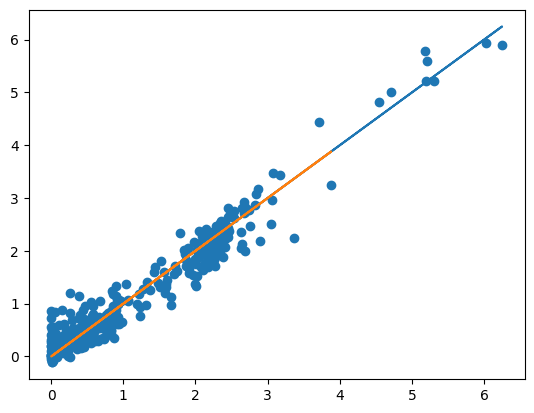

In [13]:
model= CustomModel()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)

# Learning Loop
num_epochs = 100000
losses = []

for epoch in range(num_epochs+1):
    # forward_propagation
    y_pred = model(X)
    loss = criterion(y_pred,Y)

    # back_propagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())
    if (epoch + 1) % 10000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.6f}')



y_pred2 = model(X)

plt.scatter(Y,y_pred2.detach().numpy())
plt.plot(Y,Y)

In [7]:
torch.save(model.state_dict(), 'model.pth')